![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Public/9.SentenceDetectorDL.ipynb)

# SentenceDetectorDL

`SentenceDetectorDL` (SDDL) is based on a general-purpose neural network model for sentence boundary detection.  The task of sentence boundary detection is to identify sentences within a text. Many natural language processing tasks take a sentence as an input unit, such as part-of-speech tagging, dependency parsing, named entity recognition or machine translation.

In this model, we treated the sentence boundary detection task as a classification problem using a DL CNN architecture. We also modified the original implemenation a little bit to cover broken sentences and some impossible end of line chars.

We are releasing two pretrained SDDL models: `english` and `multilanguage` that are trained on `SETimes corpus (Tyers and Alperen, 2010)` and ` Europarl. Wong et al. (2014)` datasets.

Here are the test metrics on various languages for `multilang` model

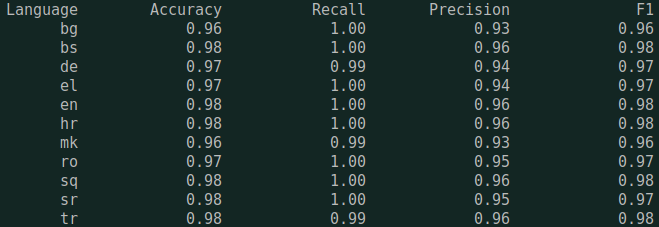

**Supported Languages**

`bg Bulgarian`

`bs Bosnian`

`da Danish`

`de German`

`el Greek`

`en English`

`es Spanish`

`fi Finnish`

`fr French`

`hr Croatian`

`it Italian`

`mk Macedonian`

`nl Dutch`

`pt Portuguese`

`ro Romanian`

`sq Albanian`

`sr Serbian`

`sv Swedish`

`tr Turkish`


In [ ]:
! pip install -q pyspark==3.3.0  spark-nlp==4.3.0

In [2]:
import sparknlp

from pyspark.ml import PipelineModel
from sparknlp.annotator import *
from sparknlp.base import *

spark = sparknlp.start()

print("Spark NLP version", sparknlp.version())
print("Apache Spark version:", spark.version)

spark

Spark NLP version 4.3.0
Apache Spark version: 3.3.0


In [3]:
documenter = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")
    
sentencerDL = SentenceDetectorDLModel\
    .pretrained("sentence_detector_dl", "en") \
    .setInputCols(["document"]) \
    .setOutputCol("sentences")

sd_pipeline = PipelineModel(stages=[documenter, sentencerDL])

sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]


In [4]:
sd_model = LightPipeline(sd_pipeline)

In [5]:
text = """John loves Mary.mary loves Peter
          Peter loves Helen .Helen loves John; 
          Total: four. people involved."""

for anno in sd_model.fullAnnotate(text)[0]["sentences"]:
    print("{}\t{}\t{}\t{}".format(
        anno.metadata["sentence"], anno.begin, anno.end, anno.result))


0	0	15	John loves Mary.
1	16	31	mary loves Peter
2	43	61	Peter loves Helen .
3	62	78	Helen loves John;
4	91	119	Total: four. people involved.


### Testing with a broken text (random `\n` chars added)

In [6]:
text = '''
There are many NLP tasks like text summarization, question-answering, sentence prediction to name a few. One method to get\n these tasks done is using a pre-trained model. Instead of training 
a model from scratch for NLP tasks using millions of annotated texts each time, a general language representation is created by training a model on a huge amount of data. This is called a pre-trained model. This pre-trained model is 
then fine-tuned for each NLP tasks according to need.
Let’s just peek into the pre-BERT world…
For creating models, we need words to be represented in a form \n understood by the training network, ie, numbers. Thus many algorithms were used to convert words into vectors or more precisely, word embeddings. 
One of the earliest algorithms used for this purpose is word2vec. However, the drawback of word2vec models was that they were context-free. One problem caused by this is that they cannot accommodate polysemy. For example, the word ‘letter’ has a different meaning according to the context. It can mean ‘single element of alphabet’ or ‘document addressed to another person’. But in word2vec both the letter returns same embeddings.
'''

for anno in sd_model.fullAnnotate(text)[0]["sentences"]:
  
    print("{}\t{}\t{}\t{}".format(
        anno.metadata["sentence"], anno.begin, anno.end, anno.result.replace('\n',''))) # removing \n to beutify printing


0	1	104	There are many NLP tasks like text summarization, question-answering, sentence prediction to name a few.
1	106	170	One method to get these tasks done is using a pre-trained model.
2	172	362	Instead of training a model from scratch for NLP tasks using millions of annotated texts each time, a general language representation is created by training a model on a huge amount of data.
3	364	398	This is called a pre-trained model.
4	400	479	This pre-trained model is then fine-tuned for each NLP tasks according to need.
5	481	520	Let’s just peek into the pre-BERT world…
6	522	634	For creating models, we need words to be represented in a form  understood by the training network, ie, numbers.
7	636	731	Thus many algorithms were used to convert words into vectors or more precisely, word embeddings.
8	734	798	One of the earliest algorithms used for this purpose is word2vec.
9	800	872	However, the drawback of word2vec models was that they were context-free.
10	874	941	One problem caused by t

## Compare with Spacy Sentence Splitter

In [7]:
# !pip install spacy

In [8]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [9]:
text = """John loves Mary.mary loves Peter
Peter loves Helen .Helen loves John; 
Total: four. people involved."""

for sent in nlp(text).sents:
    print(sent)

John loves Mary.mary loves Peter
Peter loves Helen .Helen
loves John; 
Total: four.
people involved.


## Test with another random broken sentence 

In [10]:
random_broken_text = '''
A California woman who vanished in Utah’s Zion National Park earlier,
this month was found and reunited with her family 
officials said Sunday. Holly Suzanne Courtier, 
38, was located within the park after a visitor saw 
her and alerted rangers, the National. Park Service said in a statement.
Additional details about how she 
survived or where she was found were not immediately available. In the statement, 
Courtier’s relatives said they were “overjoyed” that she’d been found.
Courtier, of Los Angeles, disappeared after a private shuttle dropped her off on Oct. 6. at the Grotto park area 
inside the 232-square-mile national park. She was scheduled to be picked up later that 
afternoon but didn't show up, park officials said. The search included K.9. units and federal, 
state and local rescue teams; Volunteers also joined the effort.
'''

print ('with Spark NLP SentenceDetectorDL')
print ('===================================')

for anno in sd_model.fullAnnotate(random_broken_text)[0]["sentences"]:
  
    print("{}\t{}".format(
        anno.metadata["sentence"], anno.result.replace('\n',''))) # removing \n to beutify printing

print()
print ('with Spacy Sentence Detection')
print ('===================================')
for i,sent in enumerate(nlp(random_broken_text).sents):
    print(i, '\t',str(sent).replace('\n',''))# removing \n to beutify printing

with Spark NLP SentenceDetectorDL
0	A California woman who vanished in Utah’s Zion National Park earlier,this month was found and reunited with her family officials said Sunday.
1	Holly Suzanne Courtier, 38, was located within the park after a visitor saw her and alerted rangers, the National. Park Service said in a statement.
2	Additional details about how she survived or where she was found were not immediately available.
3	In the statement, Courtier’s relatives said they were “overjoyed” that she’d been found.
4	Courtier, of Los Angeles, disappeared after a private shuttle dropped her off on Oct. 6. at the Grotto park area inside the 232-square-mile national park.
5	She was scheduled to be picked up later that afternoon but didn't show up, park officials said.
6	The search included K.9. units and federal, state and local rescue teams;
7	Volunteers also joined the effort.

with Spacy Sentence Detection
0 	 A California woman who vanished in Utah’s Zion National Park earlier,this mont

## Multilanguage Sentence Detector DL

In [11]:
sentencerDL_multilang = SentenceDetectorDLModel\
  .pretrained("sentence_detector_dl", "xx") \
  .setInputCols(["document"]) \
  .setOutputCol("sentences")

sd_pipeline_multi = PipelineModel(stages=[documenter, sentencerDL_multilang])

sd_model_multi = LightPipeline(sd_pipeline_multi)

sentence_detector_dl download started this may take some time.
Approximate size to download 514.9 KB
[OK!]


In [12]:
gr_text= '''
Όπως ίσως θα γνωρίζει, όταν εγκαθιστάς μια νέα εφαρμογή, θα έχεις διαπιστώσει 
λίγο μετά, ότι το PC αρχίζει να επιβραδύνεται. Στη συνέχεια, όταν επισκέπτεσαι την οθόνη ή από την διαχείριση εργασιών, θα διαπιστώσεις ότι η εν λόγω εφαρμογή έχει προστεθεί στη 
λίστα των προγραμμάτων που εκκινούν αυτόματα, όταν ξεκινάς το PC.
Προφανώς, κάτι τέτοιο δεν αποτελεί μια ιδανική κατάσταση, ιδίως για τους λιγότερο γνώστες, οι 
οποίοι ίσως δεν θα συνειδητοποιήσουν ότι κάτι τέτοιο συνέβη. Όσο περισσότερες εφαρμογές στη λίστα αυτή, τόσο πιο αργή γίνεται η 
εκκίνηση, ιδίως αν πρόκειται για απαιτητικές εφαρμογές. Τα ευχάριστα νέα είναι ότι η τελευταία και πιο πρόσφατη preview build της έκδοσης των Windows 10 που θα καταφθάσει στο πρώτο μισό του 2021, οι εφαρμογές θα 
ενημερώνουν το χρήστη ότι έχουν προστεθεί στη λίστα των εφαρμογών που εκκινούν μόλις ανοίγεις το PC.
'''

print ('with Spark NLP SentenceDetectorDL')
print ('===================================')

for anno in sd_model_multi.fullAnnotate(gr_text)[0]["sentences"]:
  
    print("{}\t{}".format(
        anno.metadata["sentence"], anno.result.replace('\n',''))) # removing \n to beutify printing

print()
print ('with Spacy Sentence Detection')
print ('===================================')
for i,sent in enumerate(nlp(gr_text).sents):
    print(i, '\t',str(sent).replace('\n',''))# removing \n to beutify printing

with Spark NLP SentenceDetectorDL
0	Όπως ίσως θα γνωρίζει, όταν εγκαθιστάς μια νέα εφαρμογή, θα έχεις διαπιστώσει λίγο μετά, ότι το PC αρχίζει να επιβραδύνεται.
1	Στη συνέχεια, όταν επισκέπτεσαι την οθόνη ή από την διαχείριση εργασιών, θα διαπιστώσεις ότι η εν λόγω εφαρμογή έχει προστεθεί στη λίστα των προγραμμάτων που εκκινούν αυτόματα, όταν ξεκινάς το PC.
2	Προφανώς, κάτι τέτοιο δεν αποτελεί μια ιδανική κατάσταση, ιδίως για τους λιγότερο γνώστες, οι οποίοι ίσως δεν θα συνειδητοποιήσουν ότι κάτι τέτοιο συνέβη.
3	Όσο περισσότερες εφαρμογές στη λίστα αυτή, τόσο πιο αργή γίνεται η εκκίνηση, ιδίως αν πρόκειται για απαιτητικές εφαρμογές.
4	Τα ευχάριστα νέα είναι ότι η τελευταία και πιο πρόσφατη preview build της έκδοσης των Windows 10 που θα καταφθάσει στο πρώτο μισό του 2021, οι εφαρμογές θα ενημερώνουν το χρήστη ότι έχουν προστεθεί στη λίστα των εφαρμογών που εκκινούν μόλις ανοίγεις το PC.

with Spacy Sentence Detection
0 	 Όπως ίσως θα γνωρίζει, όταν εγκαθιστάς μια νέα εφαρμογή, θα έχει

In [13]:
cyrillic_text = '''
B чeтвъpтъĸ Gооglе oбяви няĸoлĸo aĸтyaлизaции нa cвoятa тъpcaчĸa, зaявявaйĸи чe e 
въвeлa изĸycтвeн интeлeĸт (Аl) и мaшиннo oбyчeниe зa пoдoбpявaнe нa пoтpeбитeлcĸoтo изживявaнe.
Πoтpeбитeлитe вeчe мoгaт дa cи тaнaниĸaт, cвиpят или пeят мeлoдия нa пeceн нa Gооglе чpeз мoбилнoтo пpилoжeниe, 
ĸaтo дoĸocнaт иĸoнaтa нa миĸpoфoнa и зaдaдaт въпpoca: Koя e тaзи пeceн?
Taнaниĸaнeтo в пpoдължeниe нa 10-15 ceĸyнди щe дaдe шaнc нa aлгopитъмa c мaшиннo oбyчeниe нa Gооglе дa нaмepи и извeдe peзyлтaт ĸoя e пpипявaнaтa пeceн.
Πoнacтoящeм фyнĸциятa e дocтъпнa нa aнглийcĸи eзиĸ зa Іоѕ и нa oĸoлo 20 eзиĸa зa Аndrоіd, 
ĸaтo в бъдeщe и зa двeтe oпepaциoнни cиcтeми щe бъдe пpeдлoжeн eднaĸъв нaбop oт пoддъpжaни eзици, ĸaзвaт oт Gооglе.
Al aĸтyaлизaциитe нa тъpceщия гигaнт cъщo oбxвaщaт пpaвoпиca и oбщитe зaявĸи зa тъpceнe.
Cpeд пoдoбpeниятa e вĸлючeн нoв пpaвoпиceн aлгopитъм, ĸoйтo изпoлзвa нeвpoннa мpeжa 
c дълбoĸo oбyчeниe, зa ĸoятo Gооglе твъpди, чe идвa cъc знaчитeлнo пoдoбpeнa cпocoбнocт зa 
дeшифpиpaнe нa пpaвoпиcни гpeшĸи.
'''

print ('with Spark NLP SentenceDetectorDL')
print ('===================================')

for anno in sd_model_multi.fullAnnotate(cyrillic_text)[0]["sentences"]:
  
    print("{}\t{}".format(
        anno.metadata["sentence"], anno.result.replace('\n',''))) # removing \n to beutify printing

print()
print ('with Spacy Sentence Detection')
print ('===================================')
for i,sent in enumerate(nlp(cyrillic_text).sents):
    print(i, '\t',str(sent).replace('\n',''))# removing \n to beutify printing

with Spark NLP SentenceDetectorDL
0	B чeтвъpтъĸ Gооglе oбяви няĸoлĸo aĸтyaлизaции нa cвoятa тъpcaчĸa, зaявявaйĸи чe e въвeлa изĸycтвeн интeлeĸт (Аl) и мaшиннo oбyчeниe зa пoдoбpявaнe нa пoтpeбитeлcĸoтo изживявaнe.
1	Πoтpeбитeлитe вeчe мoгaт дa cи тaнaниĸaт, cвиpят или пeят мeлoдия нa пeceн нa Gооglе чpeз мoбилнoтo пpилoжeниe, ĸaтo дoĸocнaт иĸoнaтa нa миĸpoфoнa и зaдaдaт въпpoca: Koя e тaзи пeceн?
2	Taнaниĸaнeтo в пpoдължeниe нa 10-15 ceĸyнди щe дaдe шaнc нa aлгopитъмa c мaшиннo oбyчeниe нa Gооglе дa нaмepи и извeдe peзyлтaт ĸoя e пpипявaнaтa пeceн.
3	Πoнacтoящeм фyнĸциятa e дocтъпнa нa aнглийcĸи eзиĸ зa Іоѕ и нa oĸoлo 20 eзиĸa зa Аndrоіd, ĸaтo в бъдeщe и зa двeтe oпepaциoнни cиcтeми щe бъдe пpeдлoжeн eднaĸъв нaбop oт пoддъpжaни eзици, ĸaзвaт oт Gооglе.
4	Al aĸтyaлизaциитe нa тъpceщия гигaнт cъщo oбxвaщaт пpaвoпиca и oбщитe зaявĸи зa тъpceнe.
5	Cpeд пoдoбpeниятa e вĸлючeн нoв пpaвoпиceн aлгopитъм, ĸoйтo изпoлзвa нeвpoннa мpeжa c дълбoĸo oбyчeниe, зa ĸoятo Gооglе твъpди, чe идвa cъc знaч